#function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
import os
from google.colab import drive
drive.mount('/content/drive')
import warnings


warnings.filterwarnings('ignore')
def display_images_horizontal(df, column_name):
    unique_values = df[column_name].unique()
    num_images = len(unique_values)

    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5), squeeze=False)
    axes = axes.flatten()

    for i, value in enumerate(unique_values):
        subset = df[df[column_name] == value]
        if not subset.empty:
            img_url = subset.iloc[0]['Url']  # Ambil URL gambar pertama yang cocok
            img = mpimg.imread(img_url)

            axes[i].imshow(img)
            axes[i].set_title(f'{column_name}: {value}')
            axes[i].axis('off')  # Menyembunyikan axis

    plt.tight_layout()
    plt.show()

def plot_kelas_distributions(train_df, val_df, column_name):
    """
    Plot jumlah dan persentase data untuk kategori di train_df dan val_df.

    Parameters:
    - train_df: DataFrame untuk data pelatihan.
    - val_df: DataFrame untuk data validasi.
    - column_name: Nama kolom yang digunakan untuk kategori.
    """
    # Hitung jumlah data untuk setiap kategori di setiap DataFrame
    def count_kelas(df, kelas):
        return df[df[column_name] == kelas].shape[0]

    categories = train_df[column_name].unique()

    # Hitung jumlah data untuk setiap kategori di train_df dan val_df
    train_counts = [count_kelas(train_df, kelas) for kelas in categories]
    val_counts = [count_kelas(val_df, kelas) for kelas in categories]

    # Total data untuk setiap kategori di semua DataFrames
    total_counts = [train_counts[i] + val_counts[i] for i in range(len(categories))]

    # Hitung persentase untuk setiap DataFrame
    train_percentages = [count / total * 100 for count, total in zip(train_counts, total_counts)]
    val_percentages = [count / total * 100 for count, total in zip(val_counts, total_counts)]

    # Data untuk plot
    x_labels = categories
    index = range(len(categories))

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 7))

    bar_width = 0.25
    bar1 = ax.bar([i - bar_width for i in index], train_counts, bar_width, label='Train_NoAug')
    bar2 = ax.bar(index, val_counts, bar_width, label='Validation_NoAug')

    # Menambahkan persentase ke setiap bar
    def autolabel(bars, percentages):
        for bar, percentage in zip(bars, percentages):
            height = bar.get_height()
            ax.annotate(f'{height}\n({percentage:.1f}%)',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bar1, train_percentages)
    autolabel(bar2, val_percentages)

    ax.set_xlabel(column_name)
    ax.set_ylabel('Jumlah Data')
    ax.set_title(f'Jumlah Data dan Persentase untuk Setiap {column_name}')
    ax.set_xticks(index)
    ax.set_xticklabels(x_labels)
    ax.legend()

    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"{column_name:<10} | {'Train':>10} | {'Validation':>12} ")
    print('-' * 42)

    # Print data
    for i, kelas in enumerate(categories):
        print(f"{kelas:<10} | {train_counts[i]:>10} ({train_percentages[i]:>6.1f}%) | "
              f"{val_counts[i]:>12} ({val_percentages[i]:>6.1f}%)")



Mounted at /content/drive


#Load Data

In [2]:

import pandas as pd
import tensorflow as tf
print('Versi Tensorflow :',tf.__version__)

Versi Tensorflow : 2.17.0


In [3]:
import os
def create_directory_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Direktori '{directory}'\n berhasil dibuat.")
    else:
        print(f"Direktori '{directory}'\n sudah ada.")
base_path = '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/'
data_path = base_path + 'data/'
create_directory_if_not_exists(base_path)
create_directory_if_not_exists(data_path)

Direktori '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/'
 sudah ada.
Direktori '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/data/'
 sudah ada.


# Definisikan Riset

In [4]:
name_research = 'Leakage Condition Type'
skenario = 'Type'
Data = 'IDG'
name_model = 'fine_tuned_Resnet50V2'
setting ='rl(0.5 per 4)_opt[Adamax]'

#Gambar
channels = 3
size_img = (216,324)
shape_img = (size_img[0],size_img[1], channels)

# Data
# train_df = pd.read_csv(data_path+f'{Data}/Aug{Data}_train_df_{skenario}.csv')
# val_df = pd.read_csv(data_path+f'val_{skenario}_NoAug.csv')

# train_df = pd.read_csv(data_path+f'{Data}/Aug{Data}_train_df_{skenario}.csv')
# val_df = pd.read_csv(data_path+f'{Data}/Aug{Data}_val_df_{skenario}.csv')

train_df = pd.read_csv(data_path+f'Augment&split/{Data}/Augment&split_Aug_{Data}_train_df_{skenario}.csv')
val_df = pd.read_csv(data_path+f'Augment&split/{Data}/Augment&split_Aug_{Data}_val_df_{skenario}.csv')


#Train Model
epoch_n = 30
lr_patience = 5
lr_factor = 0.2
test_df = val_df

research =f'{name_research}_{skenario}_{Data}_{name_model}_{setting}'

print(f'datetime : {pd.Timestamp.now()}')
print('[!] Riset dimulai')
print(research)

research_folder = base_path + f'{name_research}/'
create_directory_if_not_exists(research_folder)

datetime : 2024-09-05 05:06:22.702741
[!] Riset dimulai
Leakage Condition Type_Type_IDG_fine_tuned_Resnet50V2_rl(0.5 per 4)_opt[Adamax]
Direktori '/content/drive/MyDrive/Skripsi_Isa Tarmana M_10120544/Program/Leakage Condition Type/'
 sudah ada.


## EDA

Skenario Type Masked:


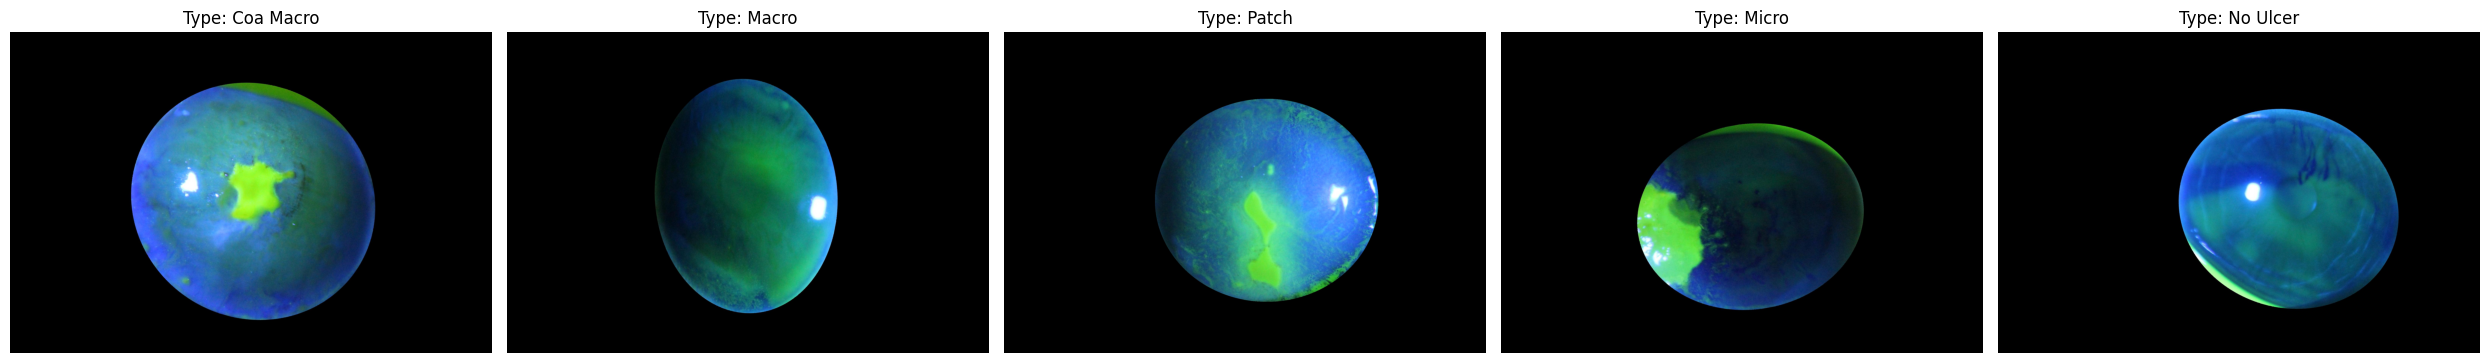

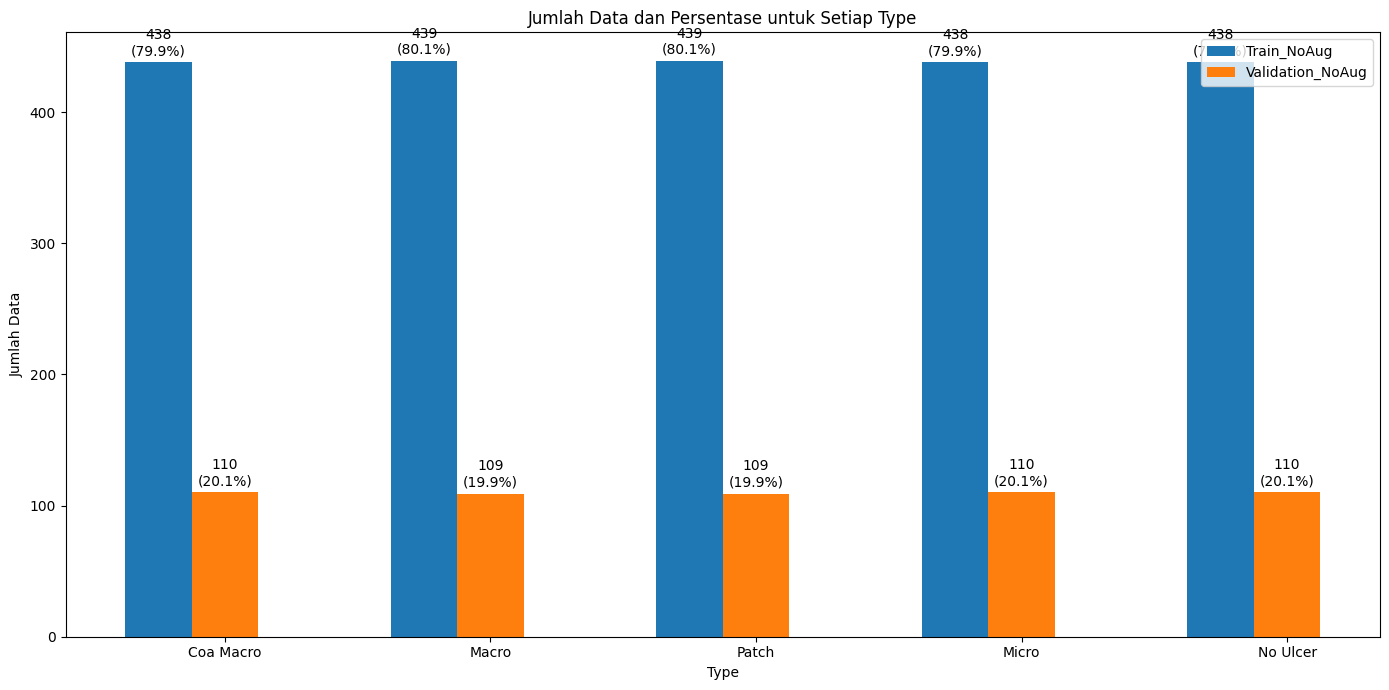

Type       |      Train |   Validation 
------------------------------------------
Coa Macro  |        438 (  79.9%) |          110 (  20.1%)
Macro      |        439 (  80.1%) |          109 (  19.9%)
Patch      |        439 (  80.1%) |          109 (  19.9%)
Micro      |        438 (  79.9%) |          110 (  20.1%)
No Ulcer   |        438 (  79.9%) |          110 (  20.1%)


In [5]:
print(f'Skenario {skenario} Masked:')
display_images_horizontal(train_df, f'{skenario}')
plot_kelas_distributions(train_df, val_df, f'{skenario}')

# Model Research

##  PreProcess

In [6]:
!pip install keras_preprocessing --quiet
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnet50v2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00


### Normalisasi

In [7]:
# Data augmentation
augment = ImageDataGenerator(
    rescale=1./255,
)

In [8]:
# Create a generator from the dataframe
train_generator = augment.flow_from_dataframe(
    dataframe=train_df,
    x_col='Url',
    y_col=skenario,
    target_size=size_img,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    batch_size=32
)
# Create validation generator
val_generator = augment.flow_from_dataframe(
    dataframe=val_df,
    x_col='Url',
    y_col=skenario,
    target_size=size_img,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    batch_size=32
)

print(train_generator.class_indices)
print(val_generator.class_indices)


Found 2192 validated image filenames belonging to 5 classes.
Found 548 validated image filenames belonging to 5 classes.
{'Coa Macro': 0, 'Macro': 1, 'Micro': 2, 'No Ulcer': 3, 'Patch': 4}
{'Coa Macro': 0, 'Macro': 1, 'Micro': 2, 'No Ulcer': 3, 'Patch': 4}


In [9]:

# # Ambil satu batch data dari train_generator
# batch = next(train_generator)

# # Ekstrak gambar dan label dari batch
# images, labels = batch

# # Ambil nama kelas dari train_generator
# class_names = list(train_generator.class_indices.keys())

# # Menampilkan satu gambar dari setiap kelas
# fig, axes = plt.subplots(1, len(class_names), figsize=(15, 15))

# for i, ax in enumerate(axes):
#     # Temukan indeks gambar yang sesuai dengan kelas i
#     class_label_index = i
#     # Ambil gambar dengan label sesuai kelas
#     # Pastikan ada gambar dengan label sesuai untuk ditampilkan
#     image_idx = np.where(np.argmax(labels, axis=1) == class_label_index)[0]

#     if len(image_idx) > 0:
#         image = images[image_idx[0]]
#         ax.imshow(image)
#         ax.set_title(class_names[class_label_index])
#         ax.axis('off')
#     else:
#         ax.set_title("No Image")
#         ax.axis('off')

# plt.show()

## Pemodelan

In [10]:
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Concatenate, GlobalMaxPooling2D, BatchNormalization, LSTM, Reshape, GlobalMaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers


### Inisiasi Model

In [11]:
base_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=shape_img  # Menyesuaikan ukuran input
)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


##### Fully Connected

In [12]:
# Menambahkan lapisan akhir
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)



In [13]:
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)  # Adjust for 3 classes
# Membangun model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 216, 324, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 222, 330, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 108, 162, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 110, 164, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 54, 81, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 54, 81, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 54, 81, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 54, 81, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 54, 81, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 54, 81, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 56, 83, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 54, 81, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 54, 81, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 54, 81, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 54, 81, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 25,668,101 (97.92 MB)

 Trainable params: 25,622,661 (97.74 MB)

 Non-trainable params: 45,440 (177.50 KB)

#### Optimizer

In [14]:
from tensorflow.keras.optimizers import Adamax, Adam

In [15]:
optimizer = Adamax(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


#### Callback

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path untuk menyimpan model terbaik berdasarkan val_accuracy dan val_loss
checkpoint_filepath_accuracy = '/content/' + f'V-acc_{research}.keras'
checkpoint_filepath_loss = '/content/' + f'V-los_{research}.keras'

# Konfigurasi ModelCheckpoint untuk memantau val_accuracy
model_checkpoint_accuracy = ModelCheckpoint(
    filepath=checkpoint_filepath_accuracy,
    save_weights_only=False,    # Menyimpan model lengkap, bukan hanya bobot
    monitor='val_accuracy',    # Pantau val_accuracy untuk menentukan model terbaik
    mode='max',                # Simpan model dengan val_accuracy tertinggi
    save_best_only=True         # Simpan hanya model terbaik
)

# Konfigurasi ModelCheckpoint untuk memantau val_loss
model_checkpoint_loss = ModelCheckpoint(
    filepath=checkpoint_filepath_loss,
    save_weights_only=False,    # Menyimpan model lengkap, bukan hanya bobot
    monitor='val_loss',        # Pantau val_loss untuk menentukan model terbaik
    mode='min',                # Simpan model dengan val_loss terendah
    save_best_only=True         # Simpan hanya model terbaik
)
import time
import numpy as np
import tensorflow as tf

class CustomScoreCheckpoint(tf.keras.callbacks.Callback):
    def __init__(self, base_path, research):
        super(CustomScoreCheckpoint, self).__init__()
        self.best_score = -np.inf
        self.best_weights = None
        self.base_path = base_path
        self.research = research
        self.val_acc_first = None
        self.val_loss_first = None
        self.epoch_start_time = None

    def on_epoch_begin(self, epoch, logs=None):
        # Record the start time at the beginning of each epoch
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        val_acc_get = logs.get('val_accuracy', 0)
        val_loss_get = logs.get('val_loss', 0)

        # Calculate the elapsed time
        elapsed_time = (time.time() - self.epoch_start_time) / 60  # Time in minutes

        # Initialize val_acc_first and val_loss_first on the first epoch
        if self.val_acc_first is None or self.val_loss_first is None:
            self.val_acc_first = val_acc_get
            self.val_loss_first = val_loss_get
            improve = 0.00
        else:
            improve = val_acc_get - self.val_acc_first + self.val_loss_first - val_loss_get

        # Print the improvement and elapsed time
        print(f"Epoch {epoch + 1}: Improve: {improve:.2f} Elapsed Time: {elapsed_time:.2f} minutes")

In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metrik yang dipantau
    factor=lr_factor,  # Faktor pengurangan laju pembelajaran
    patience=lr_patience,  # Jumlah epoch untuk menunggu sebelum mengurangi laju pembelajaran
    verbose=1,
    min_lr=1e-6  # Laju pembelajaran minimum
)


In [18]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger(f'training_log_{research}.csv')

from tensorflow.keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='./logs')
from tensorflow.keras.callbacks import TerminateOnNaN

terminate_on_nan = TerminateOnNaN()


### Pelatihan Model

In [19]:
import pandas as pd
now_time = pd.Timestamp.now()
print(f'datetime : {now_time}')
print('[!] Riset dimulai')

datetime : 2024-09-05 05:06:50.655680
[!] Riset dimulai


In [20]:

custom_checkpoint = CustomScoreCheckpoint(base_path='/content/', research=research)
# Melanjutkan pelatihan model
history = model.fit(
    train_generator,
    epochs=epoch_n,
    callbacks=[model_checkpoint_accuracy, model_checkpoint_loss, reduce_lr, terminate_on_nan,custom_checkpoint],
    validation_data=val_generator,
    validation_steps= None,
    verbose=1
)

Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.4160 - loss: 1.5068 Epoch 1: Improve: 0.00 Elapsed Time: 18.33 minutes
69/69 ━━━━━━━━━━━━━━━━━━━━ 1100s 14s/step - accuracy: 0.4175 - loss: 1.5030 - val_accuracy: 0.3339 - val_loss: 5.7585 - learning_rate: 0.0010
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 687ms/step - accuracy: 0.7039 - loss: 0.7792Epoch 2: Improve: 4.07 Elapsed Time: 1.14 minutes
69/69 ━━━━━━━━━━━━━━━━━━━━ 68s 915ms/step - accuracy: 0.7045 - loss: 0.7779 - val_accuracy: 0.4891 - val_loss: 1.8395 - learning_rate: 0.0010
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.8506 - loss: 0.4166Epoch 3: Improve: 3.41 Elapsed Time: 1.07 minutes
69/69 ━━━━━━━━━━━━━━━━━━━━ 64s 850ms/step - accuracy: 0.8505 - loss: 0.4167 - val_accuracy: 0.5365 - val_loss: 2.5507 - learning_rate: 0.0010
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 736ms/step - accuracy: 0.8869 - loss: 0.3113Epoch 4: Improve: 5.33 Elapsed Time: 1.21 minutes
69/69 ━━━━━━━━━━━━━━━━━━━━ 72s 987

In [21]:
duration = pd.Timestamp.now()-now_time
print(f'Durasi : {duration}')

Durasi : 0 days 00:53:19.017517


In [22]:
import shutil
import os
destination_folder = research_folder
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Salin model berdasarkan val_accuracy
shutil.copy(checkpoint_filepath_accuracy, destination_folder)

# Salin model berdasarkan val_loss
shutil.copy(checkpoint_filepath_loss, destination_folder)

print("Model telah disalin ke Google Drive.")

Model telah disalin ke Google Drive.


### Evaluate Train

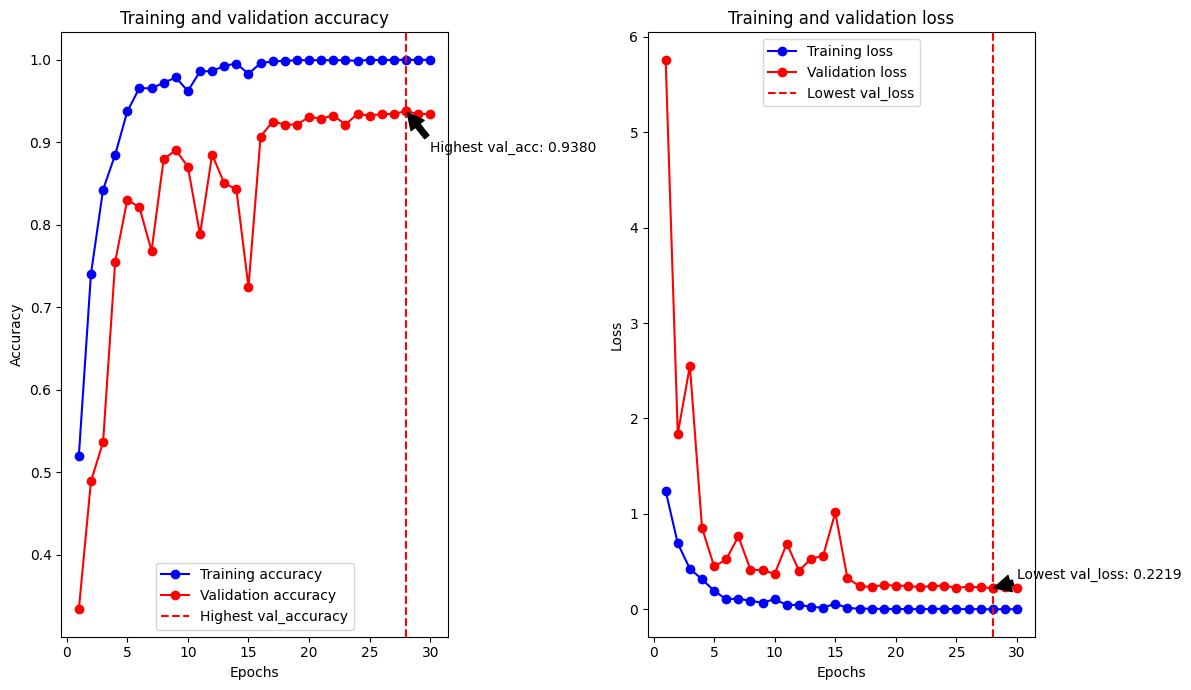

In [23]:
import matplotlib.pyplot as plt

# Misalkan `history` adalah hasil dari training model
history_dict = history.history

# Ambil data akurasi dan loss untuk training dan validasi
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Temukan titik tertinggi dan terendah untuk val_accuracy dan val_loss
max_val_acc = max(val_acc)
min_val_loss = min(val_loss)
max_val_acc_epoch = val_acc.index(max_val_acc) + 1
min_val_loss_epoch = val_loss.index(min_val_loss) + 1

# Plotting akurasi
plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axvline(max_val_acc_epoch, linestyle='--', color='r', label='Highest val_accuracy')
plt.scatter([max_val_acc_epoch], [max_val_acc], color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.annotate(f'Highest val_acc: {max_val_acc:.4f}', xy=(max_val_acc_epoch, max_val_acc), xytext=(max_val_acc_epoch+2, max_val_acc-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.axvline(min_val_loss_epoch, linestyle='--', color='r', label='Lowest val_loss')
plt.scatter([min_val_loss_epoch], [min_val_loss], color='red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.annotate(f'Lowest val_loss: {min_val_loss:.4f}', xy=(min_val_loss_epoch, min_val_loss), xytext=(min_val_loss_epoch+2, min_val_loss+0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()


In [24]:
history_dict = history.history

# Konversi ke DataFrame
df_history = pd.DataFrame(history_dict)

# Simpan DataFrame ke CSV
df_history.to_csv(research_folder+f'history_{research}.csv', index=False)

print(f"Training history saved to 'history_{research}.csv'")

Training history saved to 'history_Leakage Condition Type_Type_IDG_fine_tuned_Resnet50V2_rl(0.5 per 4)_opt[Adamax].csv'
